# 03 - K-Means Cluster Count Selection

In this notebook, we experiment with different values of k for K-Means clustering and evaluate each choice using inertia and the silhouette score. The goal is to understand how many clusters we can create with a reasonable trade-off between model complexity (more clusters) and cluster quality (how well separated the groups are).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

DATASET_PATH = Path("..") / "data" / "raw" / "spotify_tracks.csv"
df = pd.read_csv(DATASET_PATH)

## 1. Select features and prepare scaled data

In [21]:
audio_feature_columns = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

available_features = [c for c in audio_feature_columns if c in df.columns]
df_clean = df.dropna(subset=available_features)

X = df_clean[available_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_samples, n_features = X_scaled.shape

print(f"- {n_samples} songs (rows)")
print(f"- {n_features} audio features per song (columns)")

- 114000 songs (rows)
- 10 audio features per song (columns)


## 2. Evaluate K-Means for a range of k values

In [20]:
k_values = range(2, 15)
inertias = []
silhouettes = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    # Use small sample time to keep runtime fast
    sil = silhouette_score(X_scaled, labels, sample_size=10000, random_state=42)
    silhouettes.append(sil)

results = pd.DataFrame({
    "k": list(k_values),
    "inertia": inertias,
    "silhouette": silhouettes,
})
results

,k,inertia,silhouette
0,2,919448.998304,0.246615
1,3,826003.400665,0.158172
2,4,756815.174463,0.163889
3,5,693856.387801,0.168021
4,6,641712.408668,0.168813
5,7,592126.267452,0.180682
6,8,564136.367961,0.181847
7,9,536139.004201,0.164053
8,10,510451.827427,0.166926
9,11,492320.014999,0.153999


We can see the inertia and sihouette values above. We see as k increases, the inertia and silhouette value decreases. The silhouette value is approximately 0.25. This indicates that the clusters are only weakly separeted and that there is some structure. However, the underlying feature space is overlapping rather than forming sharply distinct groups. Although this value is not great, we are using real-world Spotify data, which is much harder to form distinct groups.

### Inertia vs Number of Clusters (k)

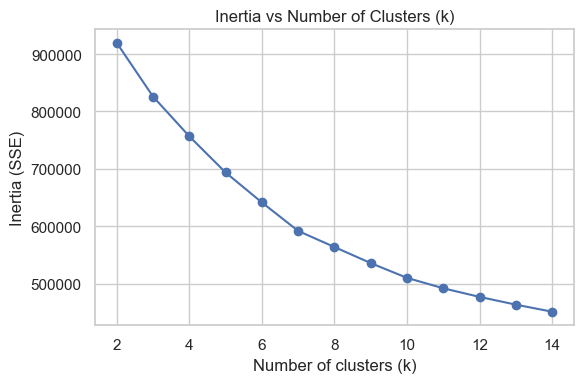

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(results["k"], results["inertia"], marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Inertia vs Number of Clusters (k)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Silhouette score vs k

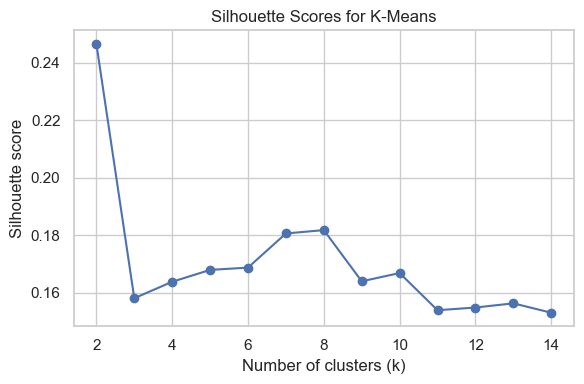

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(results["k"], results["silhouette"], marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette Scores for K-Means")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
best_row = results.loc[results["silhouette"].idxmax()]
best_row

k                  2.000000
inertia       919448.998304
silhouette         0.246615
Name: 0, dtype: float64

The table and plots above show how inertria and silhouette change with the k value. The best silhouette is reported above (~0.25).